In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras import Sequential 

In [2]:
# data 생성

x = np.arange(0, 100, 0.1)
y = np.sin(2*x) + np.cos(x)

seq_data = y.reshape(-1,1)

print(seq_data.shape)
print(seq_data[:5])

(1000, 1)
[[1.        ]
 [1.1936735 ]
 [1.36948492]
 [1.51997896]
 [1.63841708]]


In [3]:
seq_data=y.reshape(-1,1)

In [4]:
print(seq_data.shape)
print(seq_data[:5])

(1000, 1)
[[1.        ]
 [1.1936735 ]
 [1.36948492]
 [1.51997896]
 [1.63841708]]


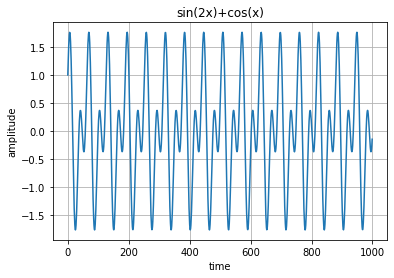

In [5]:
plt.grid()
plt.title('sin(2x)+cos(x)')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.plot(seq_data)

plt.show()

In [6]:
def seq2dataset(seq, window, horizon):

    X = []
    Y = []

    for i in range(len(seq)-(window+horizon)+1):

        x = seq[i:(i+window)]
        y = (seq[i+window+horizon-1])

        X.append(x)
        Y.append(y)

    return np.array(X), np.array(Y)
        # return X, Y       

In [7]:
# print(np.array(X[:5]))
# print(X[:5])

In [8]:
w = 20 # window size
h=1 # horizion factor

X, Y = seq2dataset(seq_data, w, h)

print(X.shape, Y.shape)

(980, 20, 1) (980, 1)


In [9]:
split_ratio=0.8

split = int(split_ratio*len(X))

x_train=X[0:split]
y_train=Y[0:split]

x_test=X[split:]
y_test=Y[split:]

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
print(y_test)

(784, 20, 1) (784, 1) (196, 20, 1) (196, 1)
[[-0.26163349]
 [-0.3227861 ]
 [-0.35972898]
 [-0.36828673]
 [-0.34555587]
 [-0.29004626]
 [-0.20176437]
 [-0.08223514]
 [ 0.06553891]
 [ 0.2371798 ]
 [ 0.42709346]
 [ 0.62868029]
 [ 0.83458855]
 [ 1.03700064]
 [ 1.22794079]
 [ 1.39959216]
 [ 1.54461048]
 [ 1.65642183]
 [ 1.7294927 ]
 [ 1.7595613 ]
 [ 1.74382093]
 [ 1.68104799]
 [ 1.5716692 ]
 [ 1.41776538]
 [ 1.22301123]
 [ 0.99255344]
 [ 0.73283168]
 [ 0.45134929]
 [ 0.15640265]
 [-0.14322034]
 [-0.43856091]
 [-0.72081678]
 [-0.98166335]
 [-1.21355631]
 [-1.41000392]
 [-1.56579829]
 [-1.67719678]
 [-1.74204655]
 [-1.75984752]
 [-1.73175147]
 [-1.66049753]
 [-1.55028679]
 [-1.40660125]
 [-1.23597437]
 [-1.04572254]
 [-0.84364834]
 [-0.63772719]
 [-0.43579029]
 [-0.24521617]
 [-0.0726432 ]
 [ 0.0762854 ]
 [ 0.19713424]
 [ 0.28683756]
 [ 0.34380394]
 [ 0.3679599 ]
 [ 0.36073092]
 [ 0.3249607 ]
 [ 0.26477225]
 [ 0.18537664]
 [ 0.09283707]
 [-0.00620175]
 [-0.10480803]
 [-0.19606911]
 [-0.273396

In [10]:
model = Sequential()

#model.add(SimpleRNN(units=128, activation='tanh',input_shape=x_train[0].shape))

model.add(SimpleRNN(units=128, activation='tanh',input_shape=(20,1)))

model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 128)               16640     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 16,769
Trainable params: 16,769
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

hist=model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
25/25 [==============================] - 8s 87ms/step - loss: 0.0857 - mae: 0.1918 - val_loss: 0.0100 - val_mae: 0.0823
Epoch 2/100
25/25 [==============================] - 2s 62ms/step - loss: 0.0022 - mae: 0.0348 - val_loss: 7.4515e-04 - val_mae: 0.0216
Epoch 3/100
25/25 [==============================] - 2s 65ms/step - loss: 4.8383e-04 - mae: 0.0167 - val_loss: 5.8017e-05 - val_mae: 0.0062
Epoch 4/100
25/25 [==============================] - 1s 31ms/step - loss: 3.2976e-05 - mae: 0.0046 - val_loss: 1.0855e-05 - val_mae: 0.0028
Epoch 5/100
25/25 [==============================] - 1s 33ms/step - loss: 1.2074e-05 - mae: 0.0029 - val_loss: 1.0615e-05 - val_mae: 0.0027
Epoch 6/100
25/25 [==============================] - 1s 30ms/step - loss: 8.1622e-06 - mae: 0.0024 - val_loss: 6.8352e-06 - val_mae: 0.0022
Epoch 7/100
25/25 [==============================] - 1s 32ms/step - loss: 7.2117e-06 - mae: 0.0022 - val_loss: 6.7494e-06 - val_mae: 0.0021
Epoch 8/100
25/25 [=============

In [12]:
pred=model.predict(x_test)
print(pred.shape)

(196, 1)


In [13]:
rand_idx = np.random.randint(0, len(y_test), size=10)

print('rand_idx = ', rand_idx, '\n')
print('pred =', pred.flatten()[rand_idx])
print('label =', y_test.flatten()[rand_idx])
# print(y_test)

rand_idx =  [105  83 124  90 156 107 122   4 180 142] 

pred = [-1.3768232   1.7498214  -0.12531652  0.42831883 -0.5142329  -1.0279582
  0.06878281 -0.34008485  0.34603822  1.5564594 ]
label = [-1.37960403  1.73656431 -0.12085209  0.40246168 -0.53536881 -1.01235445
  0.0764517  -0.34555587  0.36891827  1.58621685]


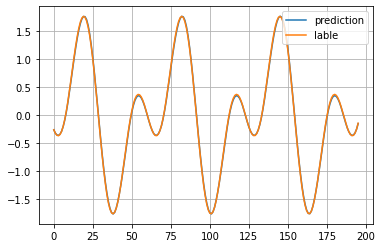

In [14]:
plt.plot(pred, label='prediction')
plt.plot(y_test, label='lable')
plt.grid()
plt.legend(loc='best')
plt.show()
